<a href="https://colab.research.google.com/github/HananLuayAli/HananLuayAli/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "Real estate.csv"
df = pd.read_csv(file_path)

# Data cleaning and preperation
if 'No' in df.columns:
    df = df.drop(columns=['No'])


print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


                            X1 transaction date  Y house price of unit area
X1 transaction date                    1.000000                    0.087491
Y house price of unit area             0.087491                    1.000000


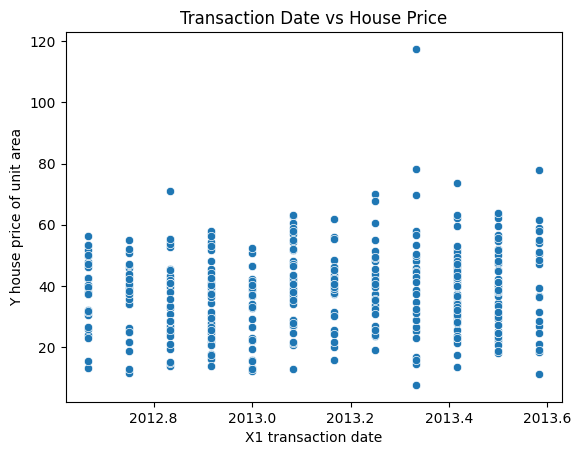

In [ ]:
# Exploratory analysis and features selection
# Correlation with the Tranaction Date
print(df[['X1 transaction date', 'Y house price of unit area']].corr())
sns.scatterplot(data=df, x='X1 transaction date', y='Y house price of unit area')
plt.title('Transaction Date vs House Price')
plt.show()

In [ ]:
# Drop the X1 transaction date column
if 'X1 transaction date' in df.columns:
    df = df.drop(columns=['X1 transaction date'])


Correlation with Target (Y house price of unit area):
 X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
Y house price of unit area                1.000000
Name: Y house price of unit area, dtype: float64


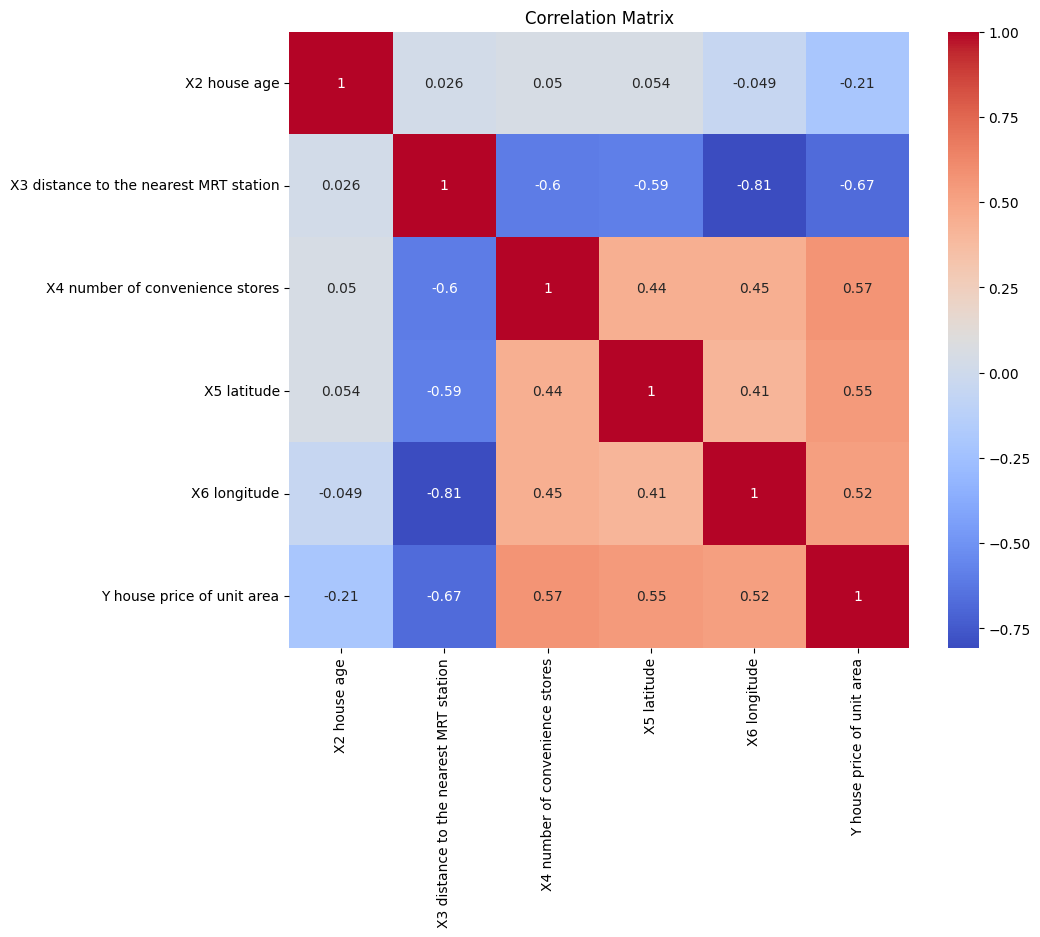

In [ ]:
# Compute correlation matrix
correlation_matrix = df.corr()
print("\nCorrelation with Target (Y house price of unit area):\n", correlation_matrix['Y house price of unit area'])

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()



/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

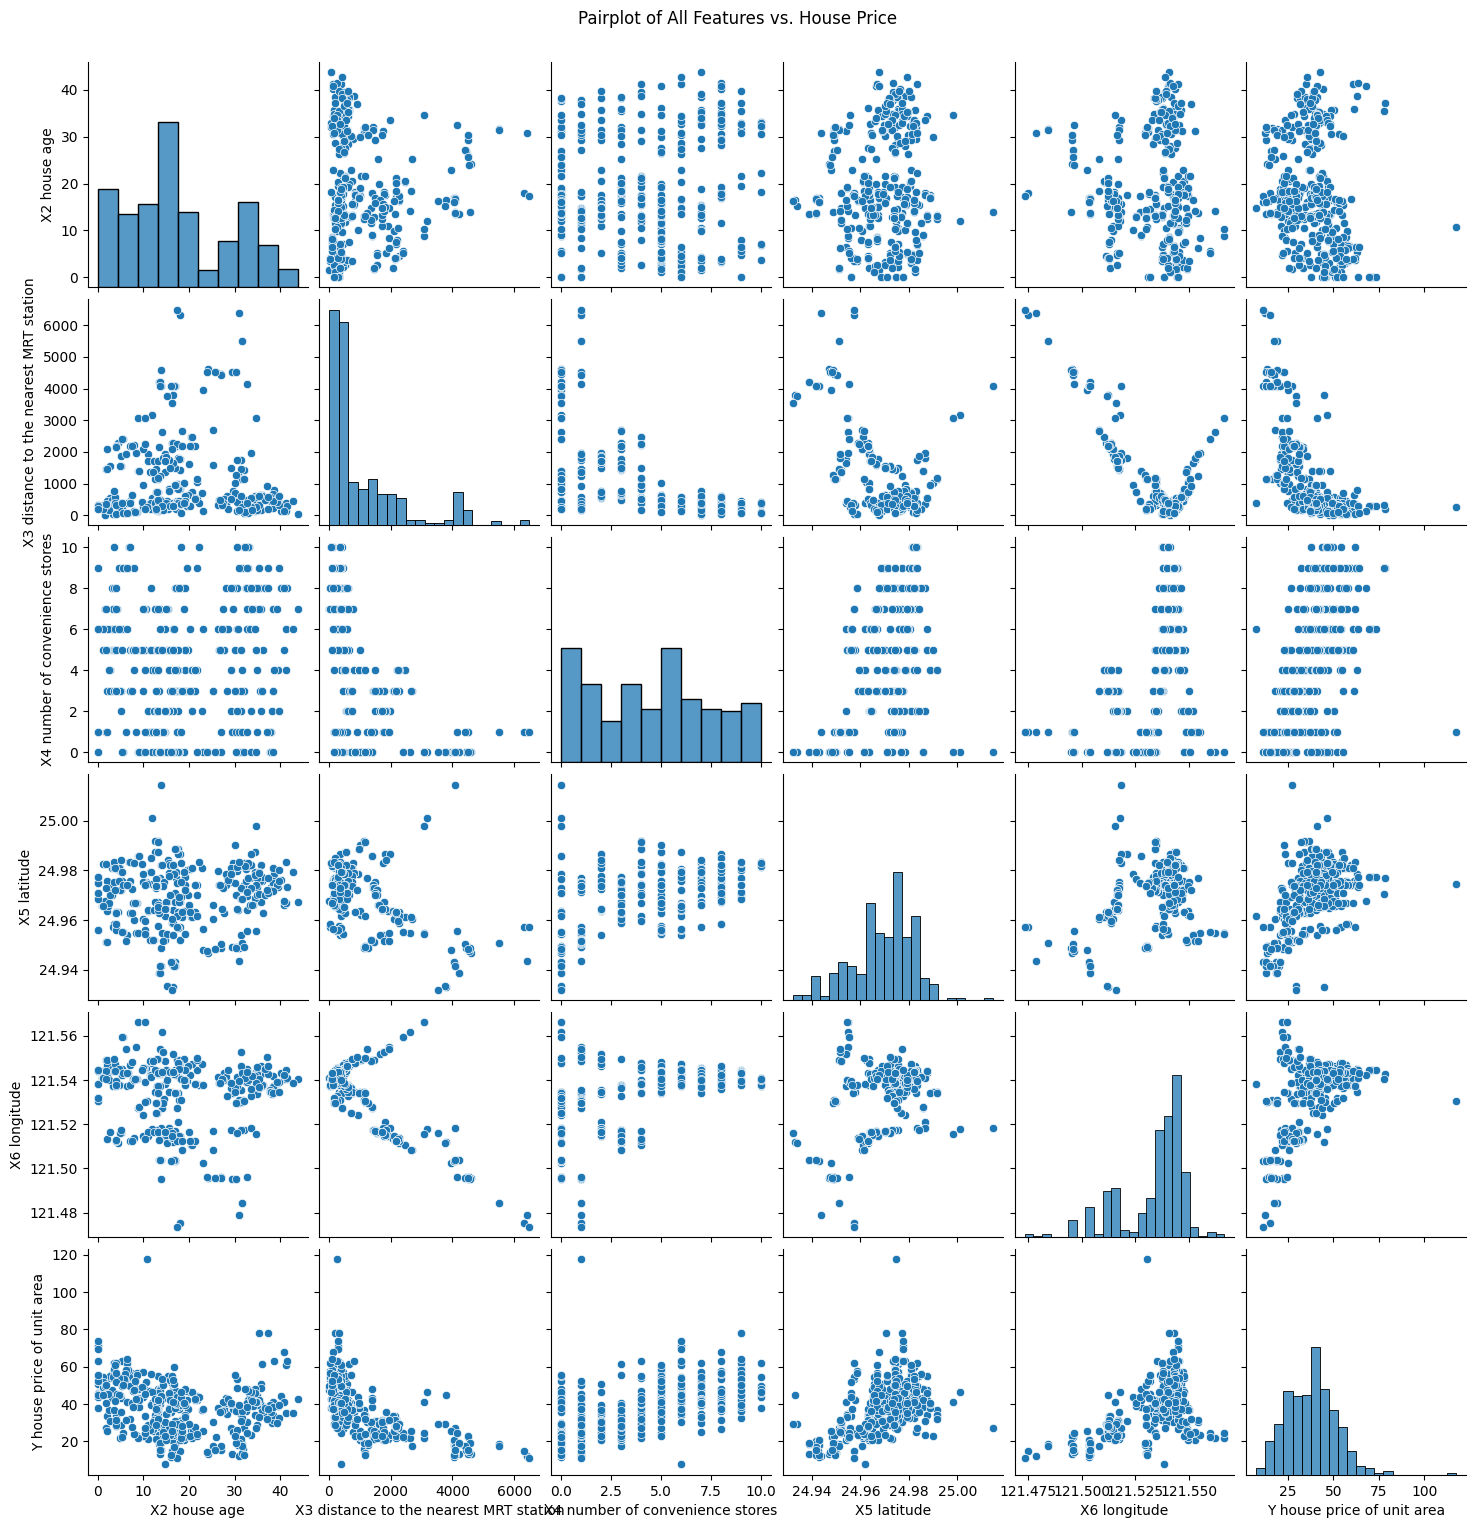

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

features = df.select_dtypes(include=[np.number]).columns  # Select only numeric columns
sns.pairplot(df[features], palette=["orange", "blue"])
plt.suptitle("Pairplot of All Features vs. House Price", y=1.02)
plt.show()



In [6]:
# Use features with higher correlation for modeling
X = df[['X6 longitude', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude']]
y = df['Y house price of unit area']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

# Display coefficients
print("\nModel Coefficients:", model.coef_)



Model Evaluation:
Mean Squared Error (MSE): 63.90493104709306
R-squared: 0.6190687388691194

Model Coefficients: [-8.84132092e+00 -4.70882212e-03  1.00769054e+00  2.21632669e+02]


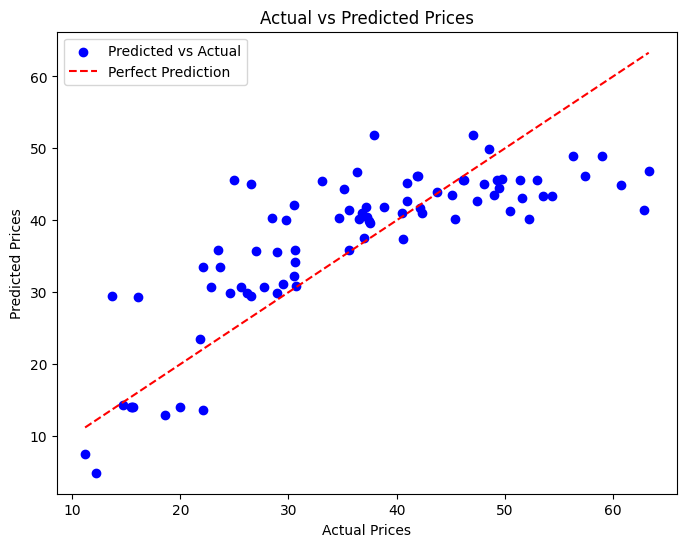

In [ ]:
#Plot Actual vs Predicted Prices
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()